In [3]:
import cv2
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
color_map = {
    'red': [
        {
            'lower': np.array([0, 50, 50]),
            'upper': np.array([10, 255, 255])
        },
        {
            'lower': np.array([161, 50, 50]),
            'upper': np.array([179, 255, 255])
        }
    ],
    'orange': {
        'lower': np.array([11, 50, 50]),
        'upper': np.array([25, 255, 255])
    },
    'yellow': {
        'lower': np.array([26, 50, 50]),
        'upper': np.array([34, 255, 255])
    },
    'green': {
        'lower': np.array([35, 50, 50]),
        'upper': np.array([77, 255, 255])
    },
    'blue': {
        'lower': np.array([78, 50, 50]),
        'upper': np.array([125, 255, 255])
    },
    'purple': {
        'lower': np.array([126, 50, 50]),
        'upper': np.array([160, 255, 255])
    },
    'white': {
        'lower': np.array([0, 0, 200]),
        'upper': np.array([179, 30, 255])
    },
    'black': {
        'lower': np.array([0, 0, 0]),
        'upper': np.array([179, 255, 30])
    },
    'brown': {
        'lower': np.array([0, 0, 31]),
        'upper': np.array([179, 255, 100])
    },
}

def get_colored_pixels(color, frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    mapp = color_map[color]

    if isinstance(mapp, list):
        mask = cv2.inRange(hsv, mapp[0]['lower'], mapp[0]['upper'])
        mask += cv2.inRange(hsv, mapp[1]['lower'], mapp[1]['upper'])
    else:
        mask = cv2.inRange(hsv, mapp['lower'], mapp['upper'])

    masked = cv2.bitwise_and(frame, frame, mask=mask)
    return masked


In [33]:
# image = cv2.imread('../color_wheel.jpg')
# image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)

# # show the image
# cv2.imshow('frame', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# for color in sorted(color_map.keys()):
#     mask = get_colored_pixels(color, image)

#     print(color)

#     # display the image
#     cv2.imshow('frame', mask)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    

In [49]:
# save the first 10 frames of the video as a video
cap = cv2.VideoCapture('../test2_original.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
writer = cv2.VideoWriter('../test2_clip.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

for i in tqdm(range(10)):
    ret, frame = cap.read()
    writer.write(frame)

cap.release()
writer.release()

100%|██████████| 10/10 [00:00<00:00, 24.57it/s]


In [34]:
capture = cv2.VideoCapture('../test2_original.mp4')

data = []

progress = tqdm(total=int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
frame_index = 0

while True:
    ret, frame = capture.read()

    progress.update(1)
    frame_index += 1

    if not ret:
        break

    for color in sorted(color_map.keys()):
        mask = get_colored_pixels(color, frame)

        # convert to grayscale
        gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # get the total number of pixels
        total = gray.shape[0] * gray.shape[1]

        # get the total number of pixels with color
        total_color = np.count_nonzero(gray)

        # get the percentage of pixels with color
        percentage = total_color / total

        #print(color, percentage)

        data.append([color, percentage, frame_index])

capture.release()

df = pd.DataFrame(data, columns=['color', 'percentage', 'frame'])

df.to_csv('../data/color_anaylsis.csv', index=False)

  1%|          | 27/2400 [00:01<02:39, 14.92it/s]

KeyboardInterrupt: 

In [11]:
df = pd.read_csv('../data/color_anaylsis.csv')
df

,color,percentage,frame
0,black,0.000000,1
1,blue,0.962963,1
2,brown,0.021310,1
3,green,0.000000,1
4,orange,0.000000,1
...,...,...,...
20938,orange,0.000000,2327
20939,purple,0.000000,2327
20940,red,0.000000,2327
20941,white,0.000000,2327


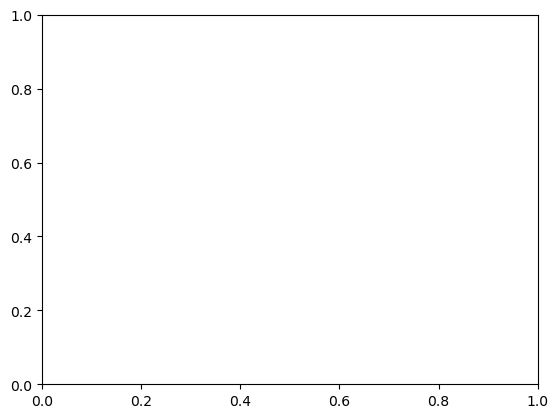

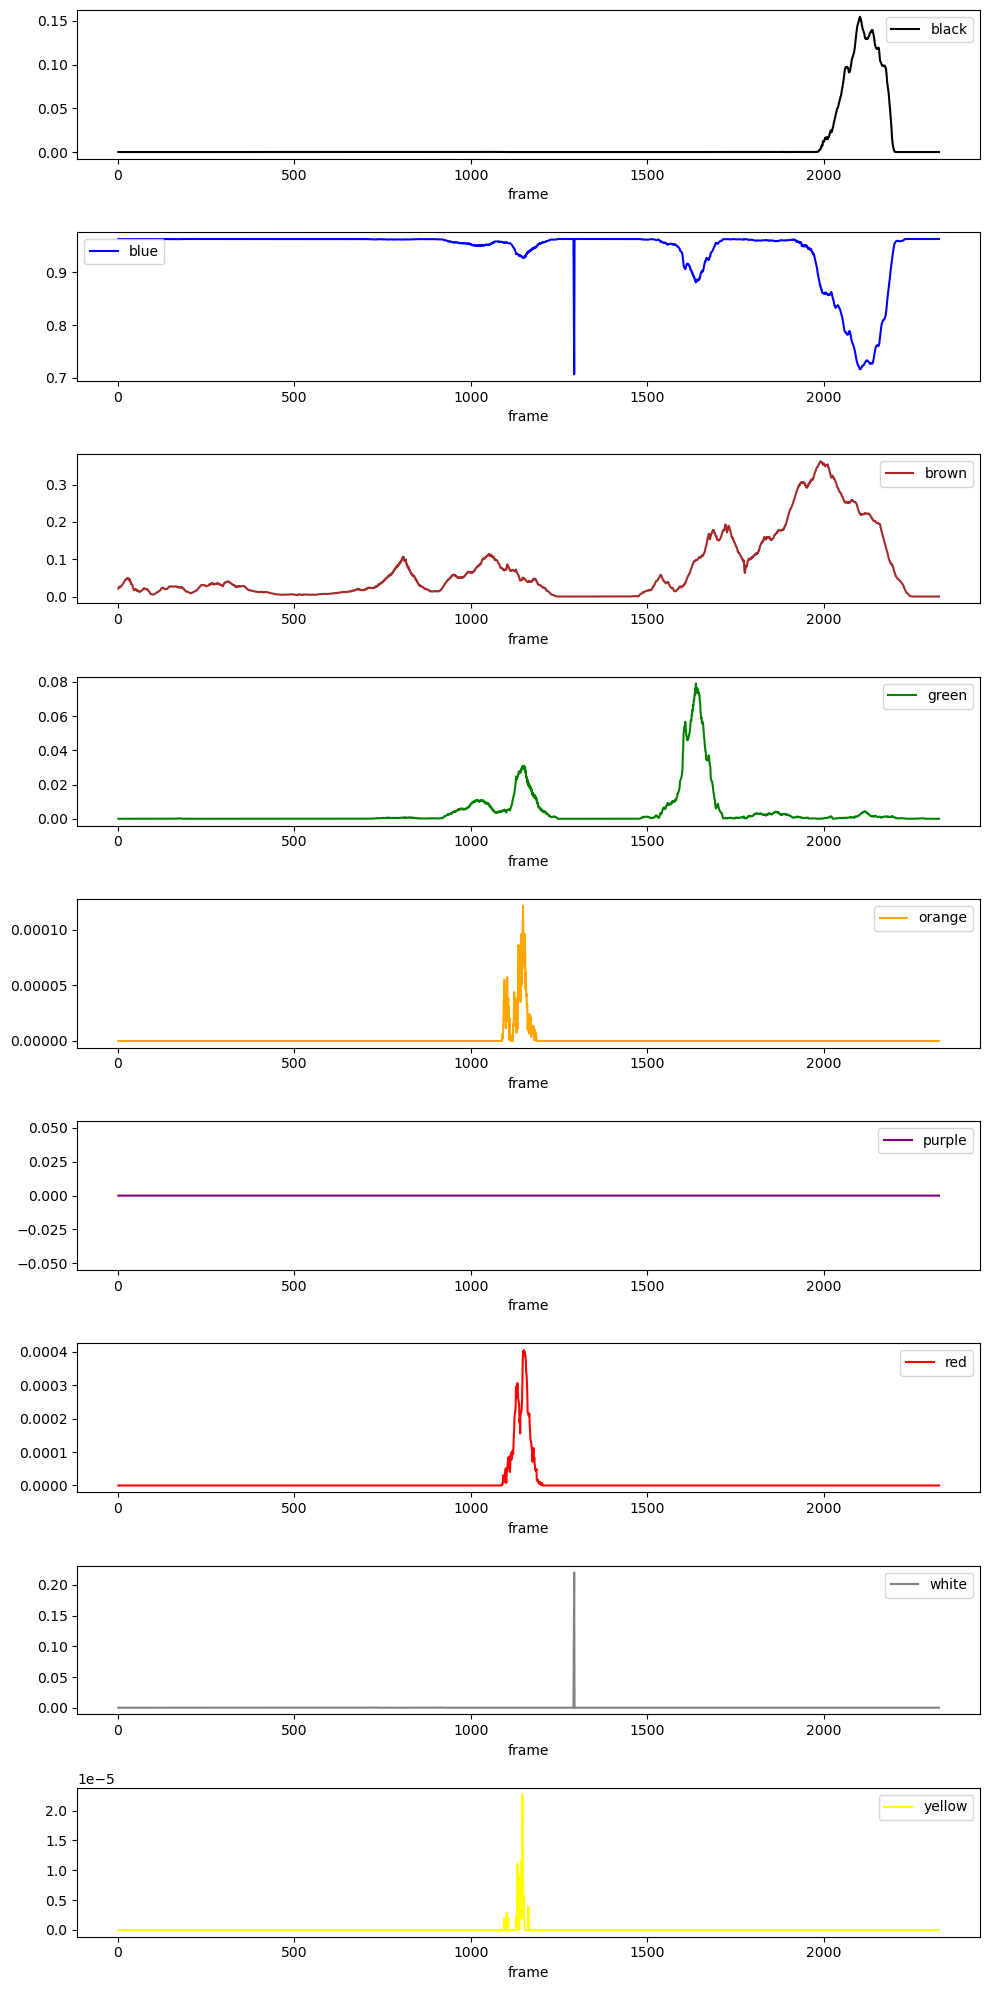

In [7]:
# df.to_csv('color_analysis.csv', index=False)

# # plot each column in a seperate subplot
# df.plot(subplots=True, figsize=(10, 10))

# plt.show()

# plot each color in a seperate subplot in a single image

# create the single plot
fig, ax = plt.subplots()

# setup 10 subplots
fig, axs = plt.subplots(9, 1, figsize=(10, 20))

# loop through each color
for i, color in enumerate(sorted(color_map.keys())):
    # get the data for the color
    color_data = df[df['color'] == color]

    # plot the data without axis labels
    line_color = color
    if color == 'white':
        line_color = 'gray'
    color_data.plot(x='frame', y='percentage', ax=axs[i], label=color, color=line_color)


#color_data.plot(x='frame', y='percentage', ax=axs[i], label=color, color=color)

# organize the subplots
fig.tight_layout()
# set a white background
fig.patch.set_facecolor('white')

plt.show()


# # loop through each color
# for color in sorted(color_map.keys()):
#     # get the data for the color
#     color_data = df[df['color'] == color]

#     # plot the data
#     color_data.plot(x='frame', y='percentage', ax=ax, label=color, color=color)

# plt.show()



In [46]:
# get the top 3 colors for the whole video
top_colors = df.groupby('color').sum().sort_values('percentage', ascending=False).head(5).index
print(top_colors)

Index(['blue', 'brown', 'black', 'green', 'white'], dtype='object', name='color')


Index(['frame_index', 'total_objects', 'median_motion', 'rating'], dtype='object')


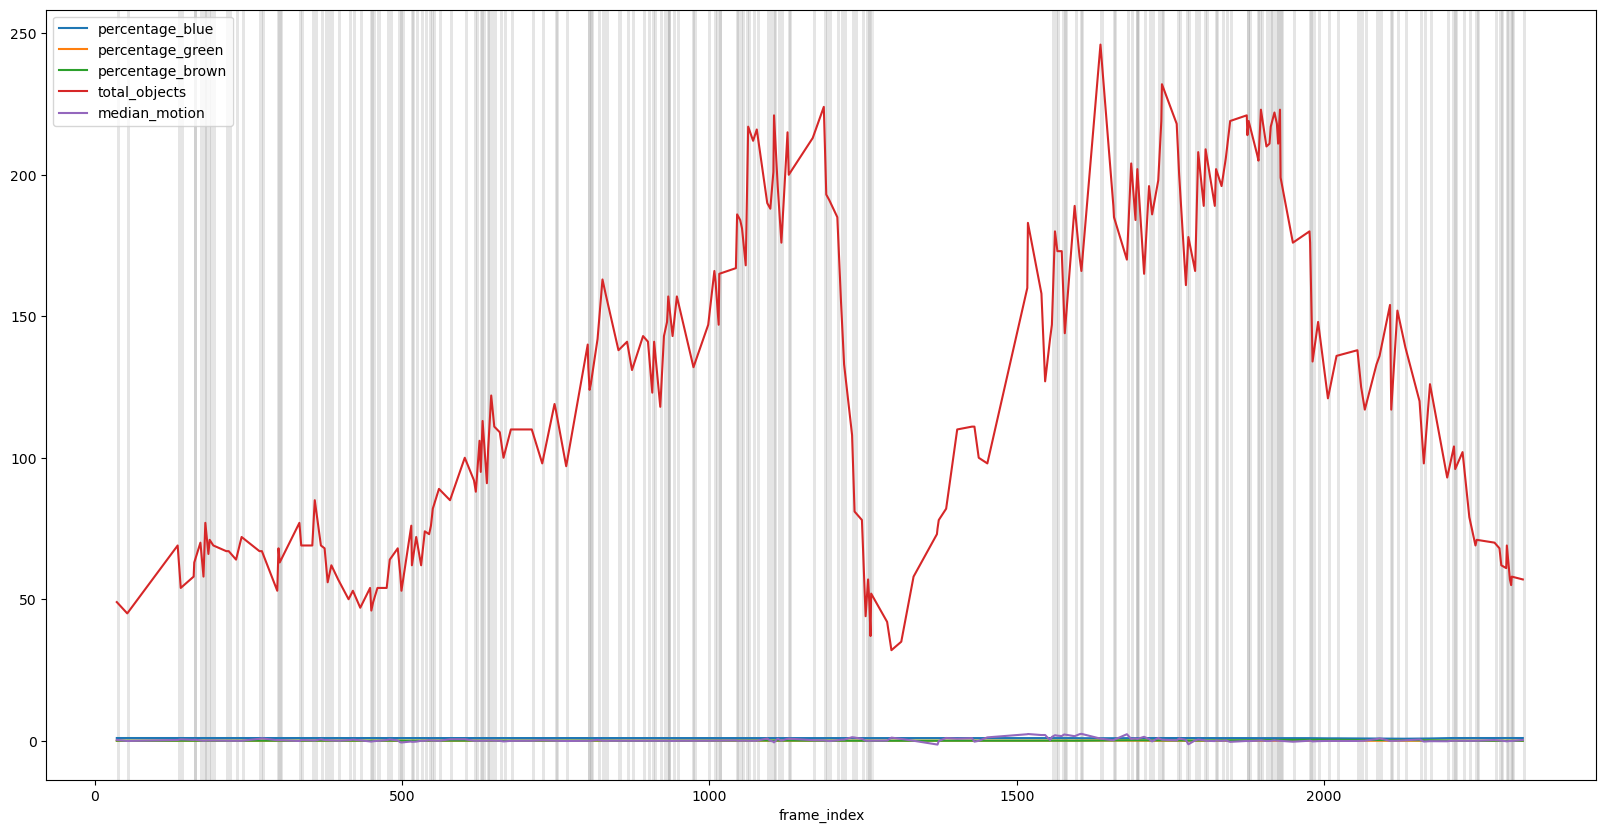

In [43]:
feature_df = pd.read_csv('../data/data.csv')
ratings_df = pd.read_csv('../data/annotated.csv')

# add the rating column to the feature dataframe
feature_df = feature_df.merge(ratings_df, on='frame_index')

print(feature_df.columns)

# add a new column for blue, green, and brown percentage

blue = df[df['color'] == 'blue']
green = df[df['color'] == 'green']
brown = df[df['color'] == 'brown']

# rename frame to frame_index
blue = blue.rename(columns={'frame': 'frame_index'})
green = green.rename(columns={'frame': 'frame_index'})
brown = brown.rename(columns={'frame': 'frame_index'}) 

# rename percentage to percentage_blue
blue = blue.rename(columns={'percentage': 'percentage_blue'})
green = green.rename(columns={'percentage': 'percentage_green'})
brown = brown.rename(columns={'percentage': 'percentage_brown'})

# add the percentage of blue, green, and brown to the feature dataframe joining on the frame_index
feature_df = feature_df.merge(blue[['frame_index', 'percentage_blue']], on='frame_index', how='left', suffixes=('', '_blue'))
feature_df = feature_df.merge(green[['frame_index', 'percentage_green']], on='frame_index', how='left', suffixes=('', '_green'))
feature_df = feature_df.merge(brown[['frame_index', 'percentage_brown']], on='frame_index', how='left', suffixes=('', '_brown'))

# scale the percentage of blue, green, and brown, total objects, and median motion to be between 0 and 1
# using scikit learn
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#feature_df[['percentage_blue', 'percentage_green', 'percentage_brown', 'total_objects', 'median_motion']] = scaler.fit_transform(feature_df[['percentage_blue', 'percentage_green', 'percentage_brown', 'total_objects', 'median_motion']])

# set the background white
plt.rcParams['figure.facecolor'] = 'white'

# plot the percentage of blue, green, and brown, total objects, and median motion
feature_df.plot(x='frame_index', y=['percentage_blue', 'percentage_green', 'percentage_brown', 'total_objects', 'median_motion'], figsize=(20, 10))

# add a background color for the rating if the rating is 1
for i, row in feature_df.iterrows():
    if row['rating'] == 1:
        plt.axvspan(row['frame_index'], row['frame_index'] + 5, facecolor='gray', alpha=0.2)
    if row['rating'] == 0:
        plt.axvspan(row['frame_index'], row['frame_index'] + 5, facecolor='white', alpha=0.2)


In [44]:
# save the feature dataframe to a csv file
feature_df.to_csv('../data/full_data.csv', index=False)